In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime


In [2]:
# Load the dataset
file_path = "extended_data.csv"
data = pd.read_csv(file_path)

# Ensure 'Date' is in datetime format
data['Date'] = pd.to_datetime(data['Date'])


In [1]:
# Define sowing date (replace with actual date if available)
sowing_date = datetime.datetime(2005, 1, 1)  # Example sowing date

# Calculate Days After Sowing (DAS)
data['DAS'] = (data['Date'] - sowing_date).dt.days


NameError: name 'datetime' is not defined

In [4]:
# Define growth phases based on DAS
def assign_growth_phase(das):
    if das < 30:  # Seeding phase
        return 'Seeding'
    elif 30 <= das < 90:  # Vegetative phase
        return 'Vegetative'
    elif 90 <= das < 150:  # Reproductive phase
        return 'Reproductive'
    else:  # Late-Season phase
        return 'Late-Season'

data['Growth_Phase'] = data['DAS'].apply(assign_growth_phase)


In [5]:
data['Temp_Range'] = data['Temp Max (°C)'] - data['Temp Min (°C)']


In [6]:
data['DayOfYear_sin'] = np.sin(2 * np.pi * data['DayOfYear'] / 365)
data['DayOfYear_cos'] = np.cos(2 * np.pi * data['DayOfYear'] / 365)


In [7]:
data['Is_Raining'] = np.where(data['Rainfall (mm)'] > 0, 1, 0)


In [8]:
data.drop(columns=['Date', 'DayOfYear'], inplace=True)


In [22]:
# Display the first few rows of the processed dataset
print(data.head(5))


         Kc  ETo (mm/day)  Temp Min (°C)  Temp Max (°C)  Humidity (%)  \
0  0.381885      4.410750       9.789106      27.353136     57.434054   
1  0.372627      4.222018      10.665783      28.499545     59.809813   
2  0.391786      4.850683       9.826846      27.045894     58.197544   
3  0.412729      4.203843      11.058563      27.979741     57.406503   
4  0.381018      4.246024      11.005993      28.735889     55.874160   

   Rainfall (mm)  Wind Speed (m/s)  Solar Radiation (MJ/m²)  ETc (mm/day)  \
0       5.111446          3.087441                18.526496      1.819442   
1       4.871262          3.113062                16.859869      1.459451   
2       4.236209          3.166388                17.351438      1.615742   
3       5.976850          3.235905                17.176950      1.641644   
4       5.319756          3.499658                16.266930      1.649583   

   DAS Growth_Phase  Temp_Range  DayOfYear_sin  DayOfYear_cos  Is_Raining  
0    0      Seeding   

In [19]:
# Display the first few rows of the processed dataset
data.tail()


,Kc,ETo (mm/day),Temp Min (°C),Temp Max (°C),Humidity (%),Rainfall (mm),Wind Speed (m/s),Solar Radiation (MJ/m²),ETc (mm/day),DAS,Growth_Phase,Temp_Range,DayOfYear_sin,DayOfYear_cos,Is_Raining
5839,0.346359,4.181085,10.093201,26.822384,57.120073,3.755115,3.098418,16.729874,1.499757,5839,Late-Season,16.729183,-5.161967e-02,0.998667,1
5840,0.368791,4.401358,9.863789,27.707284,52.938048,4.607645,3.167810,18.087707,1.500196,5840,Late-Season,17.843495,-3.442161e-02,0.999407,1
5841,0.341134,4.314445,9.939616,27.049812,52.589370,4.814911,3.313571,17.978751,1.457232,5841,Late-Season,17.110196,-1.721336e-02,0.999852,1
5842,0.338638,4.448826,10.126560,27.685468,52.074119,5.122910,3.172093,17.080473,1.471558,5842,Late-Season,17.558908,6.432491e-16,1.000000,1
5843,0.329472,3.803384,10.336397,28.165306,55.306810,4.970867,3.181733,18.038632,1.624599,5843,Late-Season,17.828908,1.721336e-02,0.999852,1


In [23]:

# Step 4: Export the extended dataset
data.to_csv('featured_data.csv', index=False)

## Viz

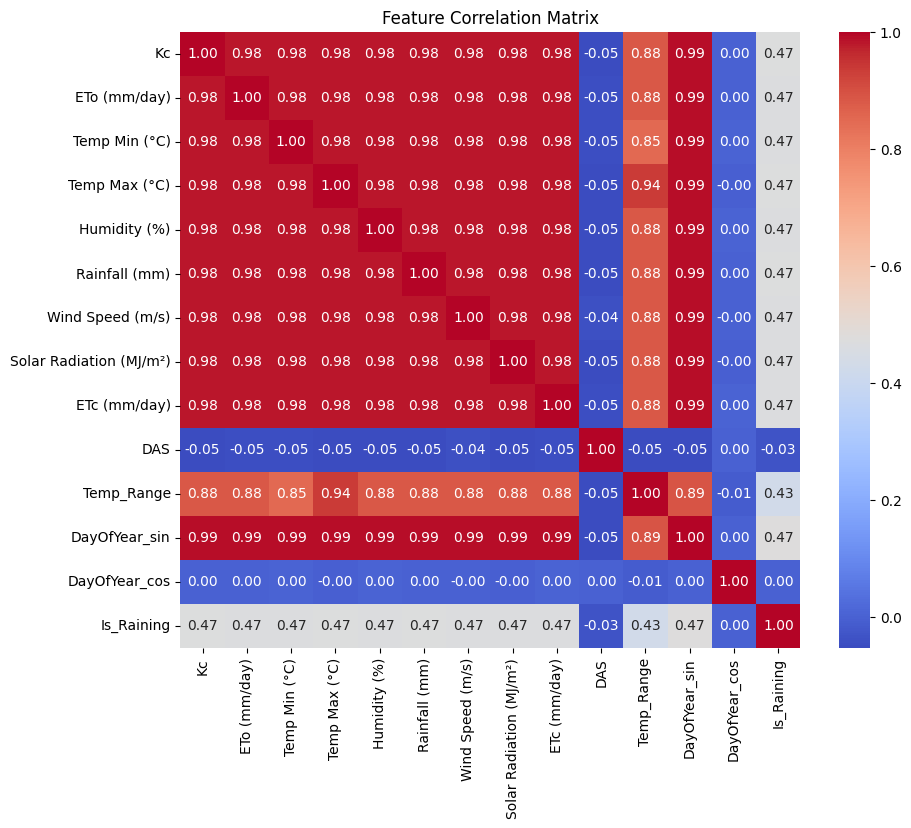

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the non-numeric columns (assuming 'Growth_Phase' is a non-numeric column)
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()